DATA CLEANING


In [2]:
import pandas as pd 
import numpy as np 
import nltk

In [3]:
df = pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# so unnamed 2 3 4 are all useless filled with NaNs , better we will remove them 

In [8]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1,inplace=True,errors = "ignore")
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**LABEL ENCODING ON TARGET IE MAKING :**
**HAM --> 0**
**SPAM--> 1**

In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
data = df["target"]

In [13]:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data)
output=encoded_data

In [14]:
output

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df["target"]=output

In [17]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**checking for NaNs**

In [18]:
df.isnull().sum()

target    0
text      0
dtype: int64

**checking for duplicates**

In [19]:
df.duplicated().sum()

403

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(5169, 2)

In [22]:
403+5169  ##5572 is the orginal number of samples taken 

5572

**cleaned data is finally available**

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


**coverting human-text into machine-friendly-text  (Data preprocessing):**

**1) Lowercase**

**2) tokenization**

**3)remooving special characters**

**4) removing stopwords and punctions**

**5) stemming**

In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssaig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
import string

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

In [30]:
print(stemmer.stem("dancing"))

danc


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    text = y[:]
    y = []
    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)
    text = y[:]
    y = []
    for word in text:
        y.append(stemmer.stem(word))
    return " ".join(y)

In [32]:
transform_text("I am Saiganesh , Hope u r doing good, How is 5454% ss a 09386e5_O+(+:}{:{")

'saiganesh hope u r good 5454 ss'

In [33]:
df["transformed_text"]=df["text"].apply(transform_text)

C:\Users\ssaig\AppData\Local\Temp\ipykernel_52092\958737439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(transform_text)


In [34]:
df

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


**vectorising the data**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [36]:
cv = CountVectorizer()
tv = TfidfVectorizer()

In [37]:
x = tv.fit_transform(df["transformed_text"]).toarray()

In [38]:
x.shape

(5169, 6708)

In [39]:
y = df["target"].values

In [40]:
y

array([0, 0, 1, ..., 0, 0, 0])

**splitiing to get teh training and testing set of data separately**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

**naive bayes model for sms classification**

In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [46]:

bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [47]:

mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


MultinomialNB
Accuracy: 0.9613152804642167
Confusion Matrix:
 [[888   1]
 [ 39 106]]
Precision: 0.9906542056074766

BernoulliNB
Accuracy: 0.9661508704061895
Confusion Matrix:
 [[885   4]
 [ 31 114]]
Precision: 0.9661016949152542

False Positives (ham marked as spam):
MultinomialNB: 1
BernoulliNB: 4


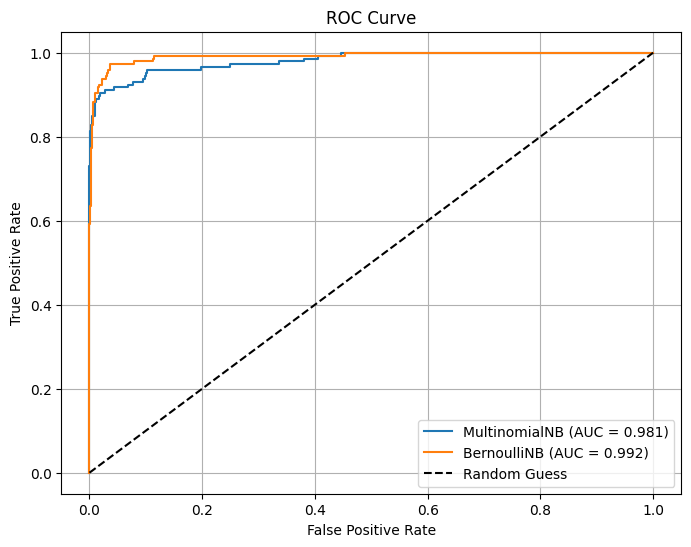

In [48]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Model 1: MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
y_proba_mnb = mnb.predict_proba(x_test)[:, 1]

# Model 2: BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
y_proba_bnb = bnb.predict_proba(x_test)[:, 1]

# Metrics
print("MultinomialNB")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

print("\nBernoulliNB")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

# False Positives
print("\nFalse Positives (ham marked as spam):")
print("MultinomialNB:", confusion_matrix(y_test, y_pred2)[0][1])
print("BernoulliNB:", confusion_matrix(y_test, y_pred3)[0][1])

# ROC Curve
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_proba_mnb)
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, y_proba_bnb)
auc_mnb = auc(fpr_mnb, tpr_mnb)
auc_bnb = auc(fpr_bnb, tpr_bnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mnb, tpr_mnb, label=f'MultinomialNB (AUC = {auc_mnb:.3f})')
plt.plot(fpr_bnb, tpr_bnb, label=f'BernoulliNB (AUC = {auc_bnb:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
